In [45]:
# requirements

import numpy as np
import time
import matplotlib.pyplot as plt


In [46]:
class kmeans():
    def __init__(self, data_path):
        self.dataPath = data_path
        self.dataSet = []   # python list
        self.centroid = None # python declair without define


    def dataIo(self, data_path):
        with open(data_path) as in_file:
            for line in in_file.readlines():
                line_arr = line.strip().split(' ')
                assert len(line_arr) == 2
                self.dataSet.append([float(line_arr[0]), float(line_arr[1])])
            self.dataSet = np.array(self.dataSet)
    

    def euclDistance(self, vector1, vector2):
        return np.sqrt(sum((vector2 - vector1)**2))


    def initCentroids(self, num_class):
        num_sample, sample_dim = self.dataSet.shape
        centroids = np.zeros((num_class, sample_dim))
        for i in range(num_class):
            index = int(np.random.uniform(0, num_sample))
            centroids[i, :] = self.dataSet[index, :]
        return centroids


    def clustering(self, cluster_num_class):
        centroids = self.initCentroids(cluster_num_class)
        print(centroids)
        num_sample, sample_dim = self.dataSet.shape
        cluster_assignment = np.mat(np.zeros((num_sample, sample_dim)))

        # clustering in loop
        iter_clustering = True
        iter_num = 0
        while iter_clustering:
            print("iteration[{}] ...".format(iter_num))
            iter_num += 1
            iter_clustering = False
            for i in range(num_sample):
                minDist = 1000000.0
                minIndex = 0 
                for j in range(cluster_num_class):
                    dist = self.euclDistance(centroids[j, :], self.dataSet[i, :])
                    if dist < minDist:
                        minDist = dist
                        minIndex = j
                    
                if cluster_assignment[i, 0] != minIndex:
                    iter_clustering = True
                    cluster_assignment[i, :] = minIndex, minDist**2
                
            for i in range(cluster_num_class):
                samples_in_cluster = self.dataSet[np.nonzero(cluster_assignment[:, 0] == i)[0]]
                centroids[i, :] = np.mean(samples_in_cluster, axis=0)
            
        self.centroid = centroids
        return centroids, cluster_assignment
    

    def membership():
        pass


    def centroids(self):
        return self.centroid


    def visualization(self, cluster_num, centroids, cluster_assignment):
        '''
            visualization
        '''
        num_sample, sample_dim = self.dataSet.shape
        mark = ['or', 'ob', 'og', 'ok', '^r', '+r', 'sr', 'dr', '<r', 'pr']

        for i in range(num_sample):
            markIndex = int(cluster_assignment[i, 0])
            plt.plot(self.dataSet[i, 0], self.dataSet[i, 1], mark[markIndex])

        mark = ['Dr', 'Db', 'Dg', 'Dk', '^b', '+b', 'sb', 'db', '<b', 'pb']
        for i in range(cluster_num):
            plt.plot(centroids[i, 0], centroids[i, 1], mark[i], ms=12.0)
        plt.show()


    def demo(self):
        '''
            main
        '''
        cluster_class_num = 3
        self.dataIo(self.dataPath)
        centroids, cluster_assignment = self.clustering(cluster_class_num)
        self.visualization(cluster_class_num, centroids, cluster_assignment)
        print('centroids:')
        print(self.centroids())



[[ 0.939512 -4.023563]
 [ 2.562539  2.884438]
 [-2.786837 -3.099354]]
iteration[0] ...
iteration[1] ...
iteration[2] ...
iteration[3] ...
iteration[4] ...


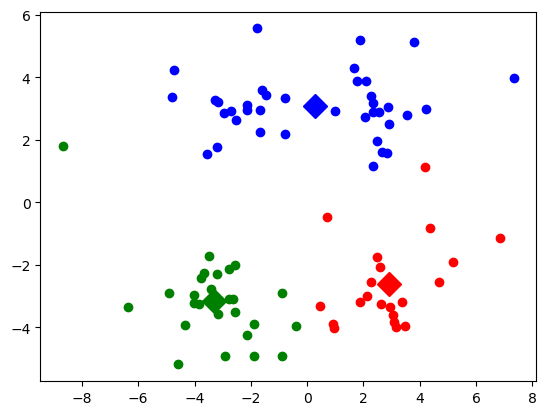

centroids:
[[ 2.91638209 -2.60950823]
 [ 0.26072634  3.07919258]
 [-3.30208654 -3.14190142]]


In [49]:
km = kmeans(data_path='../data/dataset.txt')
km.demo()